In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

plt.rcParams["font.family"] ="IPAexGothic"
N = 100

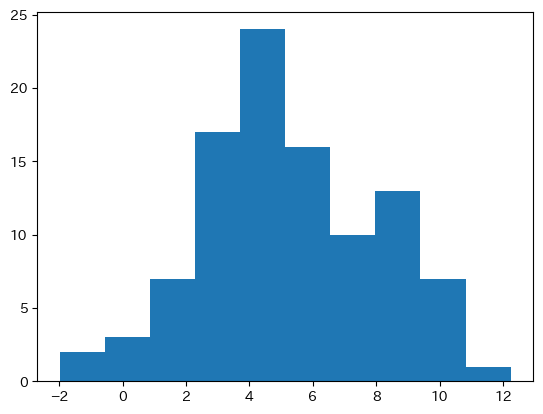

In [3]:
# 真のパラメータ
mu0, s0 = 5, 10

rng = np.random.default_rng(123)
x = rng.normal(loc=mu0, scale=np.sqrt(s0), size=N)

plt.hist(x, bins=10)
plt.show()

In [8]:
def print_result(mu, s2):
    print(f"mu = {mu} (true = {mu0})")
    print(f"var = {s2} (true = {s0})")

In [10]:
# 最尤推定量（解析的な公式を使用）
def analytical(x):
    return np.sum(x)/len(x), np.sum(np.square(x-np.sum(x)/len(x)))/len(x)

%timeit analytical(x)

mu, s2 = analytical(x)

print_result(mu, s2)


11.4 µs ± 782 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
mu = 5.2590375320160785 (true = 5)
var = 8.010277716636821 (true = 10)


In [12]:
# BFGS法（準ニュートン法）
def bfgs(x):
    # 対数尤度の符号反転(paramsは平均と標準偏差の平方根)
    nll = lambda params: -np.sum(stats.norm(loc=params[0], scale=np.square(params[1])).logpdf(x))
    rslt = optimize.minimize(nll, x0=[0,1], method="bfgs")

    return rslt.x[0], rslt.x[1]**4

%timeit bfgs(x)

mu, s2 = bfgs(x)

print_result(mu, s2)


26.6 ms ± 744 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
mu = 5.259037004486195 (true = 5)
var = 8.010277806317939 (true = 10)


In [14]:
# Nelder-Mead法
def nm(x):
    # 対数尤度の符号反転(paramsは平均と標準偏差の平方根)
    nll = lambda params: -np.sum(stats.norm(loc=params[0], scale=np.square(params[1])).logpdf(x))
    rslt = optimize.minimize(nll, x0=[0,1], method="nelder-mead")

    return rslt.x[0], rslt.x[1]**4

%timeit nm(x)

mu, s2 = bfgs(x)

print_result(mu, s2)


92.1 ms ± 5.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
mu = 5.259037004486195 (true = 5)
var = 8.010277806317939 (true = 10)
